In [25]:
import pandas as pd
import numpy as np
import math
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


In [26]:
raw_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_label = raw_data.loc[:,["DEP_DEL15"]]
test_label = test_data.loc[:,["DEP_DEL15"]]
train_data = raw_data.iloc[:, [6,7,9,10,11,12,13,14,15,16,18,19,21,22,23,24,25,26,27]]
test_data = test_data.iloc[:, [6,7,9,10,11,12,13,14,15,16,18,19,21,22,23,24,25,26,27]]

column_names = train_data.columns
train_data = train_data.values
test_data = test_data.values
train_label = train_label.values
test_label = test_label.values




In [27]:
class NaiveBayesClassifier():
    def __init__(self, X, Y, A, B):
        self.X = X
        self.Y = Y
        self.A = A
        self.B = B
        self.meanX = X.mean(0)
        self.stdX = X.std(0)
        self.stdX[self.stdX == 0] = 1

    def zscore(self, dataIn):
        self.input = dataIn
        self.output = (self.input - self.meanX) / self.stdX  ## Zscored
        return self.output



    def run(self):
        #zscoredData = self.zscore(self.X)

        dataIndex = self.shuffler(self.X)
        train_data_set = self.X[dataIndex]
        labelIndex = self.shuffler(self.A)
        train_label_set = self.A[labelIndex]
        test_data_set = self.Y
        test_label_set = self.B


        zscoredData = self.zscore(train_data_set)

        Dep_Delay_Index = []
        non_Dep_Delay_Index = []
        for i in range(len(train_label_set)):
            if train_label_set[i] == 1:
                Dep_Delay_Index.append(i)
            else:
                non_Dep_Delay_Index.append(i)


        Dep_Delay_Samples = zscoredData[Dep_Delay_Index]
        #print("dep del", Dep_Delay_Samples)
        non_Dep_Delay_Samples = zscoredData[non_Dep_Delay_Index]
        #print("non dep del", non_Dep_Delay_Samples)

        
        self.a = Dep_Delay_Samples.mean(0)
        self.b = Dep_Delay_Samples.std(0)

        self.c = non_Dep_Delay_Samples.mean(0)
        self.d = non_Dep_Delay_Samples.std(0)

        modelparams = np.zeros((19, 4))
        for j in range(test_data_set.shape[1]):
            validator = []
            for i in range(len(test_data_set)):
                delay_Likelihood = self.delayNormalDistributor(j, test_data_set[i, j])
                non_Delay_Likelihood = self.nonDelayNormalDistributor(j, test_data_set[i, j])
                if delay_Likelihood > non_Delay_Likelihood:
                    validator.append(0)
                else:
                    validator.append(1)
            #print(len(validator))
            f_score = f1_score(test_label_set.reshape(-1).tolist(), validator)
            recall = recall_score(test_label_set.reshape(-1).tolist(), validator)
            precision = precision_score(test_label_set.reshape(-1).tolist(), validator)
            accuracy = accuracy_score(test_label_set.reshape(-1).tolist(), validator)
            modelparams[j,:] = f_score, accuracy, precision, recall
        return modelparams
        
        fig = plt.figure(figsize = (10, 5))
        plt.bar(color="blue", width = 0.4, height= modelparams[:,0], x = column_names )
        plt.bar(color="blue", width=0.4, height=modelparams[:, 0], x=column_names)
        #plt.xlabel("Selected features")
        plt.ylabel("f-score")
        plt.ylim(0,1)
        plt.xticks(range(19), column_names, rotation= 45)
        plt.show()

    def delayNormalDistributor(self,index,  dataIn):
        #likelihoodProbabilities = []
        np.seterr(divide='ignore')
        ND = np.log((1.0 / (self.b[index] * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((dataIn - self.a[index]) / (self.b[index] + 1 * 10 ** -10)) ** 2))
        # for i in range(len(dataIn)):
        #     np.seterr(divide='ignore')
        #     ND = np.log((1.0 /(self.b[i] * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((dataIn[i] - self.a[i]) / (self.b[i] + 1 * 10**-10)) ** 2))
        #     likelihoodProbabilities.append(ND)
        #result = np.prod(np.array(likelihoodProbabilities))
        result = ND
        #print(result)
        return result

    def nonDelayNormalDistributor(self,index,  dataIn):
        #likelihoodProbabilities = []
        np.seterr(divide='ignore')
        ND = np.log((1.0 / (self.d[index] * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((dataIn - self.c[index]) / (self.d[index] + 1 * 10 ** -10)) ** 2))
        # for i in range(len(dataIn)):
        #     ND = np.log((1.0 /(self.d[i] * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((dataIn[i] - self.c[i]) / (self.d[i] + 1 * 10**-10)) ** 2))
        #     likelihoodProbabilities.append(ND)
        #result = np.prod(np.array(likelihoodProbabilities))
        result = ND
        #print(result)
        return result

    def shuffler(self, dataIn):
        dataPrep = dataIn
        dataIndex = np.arange(dataPrep.shape[0])
        randy = np.random.RandomState(0)
        randy.shuffle(dataIndex)
        return dataIndex

In [28]:
pop = NaiveBayesClassifier(train_data, test_data, train_label, test_label)
modelparams = pop.run()

C:\Users\Danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


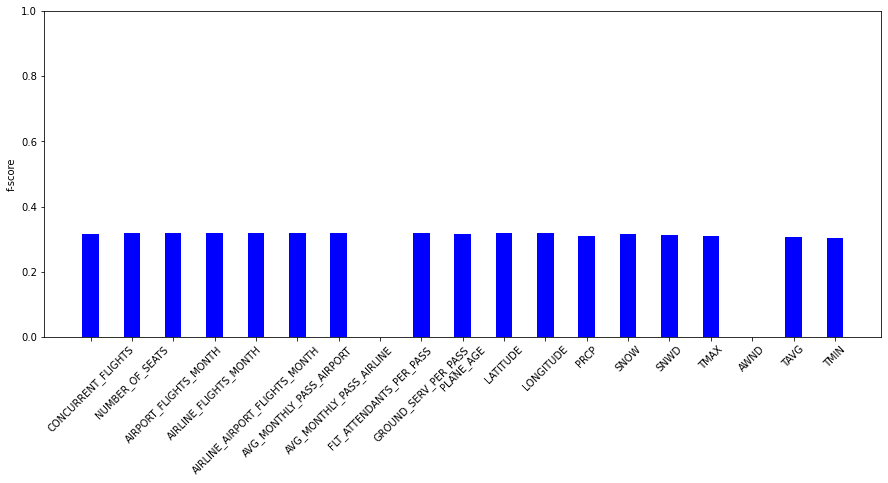

In [36]:
fig = plt.figure(figsize = (15, 6))
plt.bar(color="blue", width=0.4, height=modelparams[:, 0], x=column_names)
#plt.xlabel("Selected features")
plt.ylabel("f-score")
plt.ylim(0,1)
plt.xticks(range(19), column_names, rotation= 45)
plt.show()

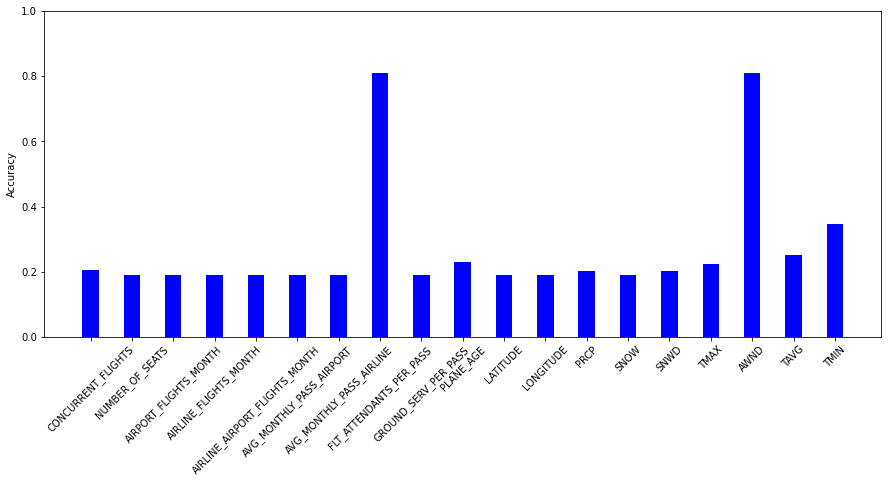

In [37]:
plt.figure(figsize = (15, 6))
plt.bar(color="blue", width = 0.4, height= modelparams[:,1], x = column_names )
#plt.xlabel("Selected features")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(range(19), column_names, rotation= 45)
plt.show()

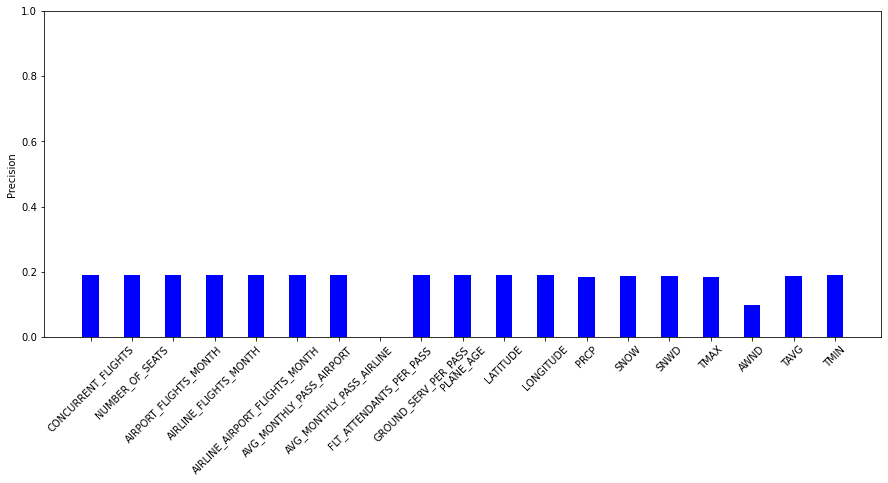

In [38]:
plt.figure(figsize = (15, 6))
plt.bar(color="blue", width = 0.4, height= modelparams[:,2], x = column_names )
#plt.xlabel("Selected features")
plt.ylabel("Precision")
plt.ylim(0,1)
plt.xticks(range(19), column_names, rotation= 45)
plt.show()

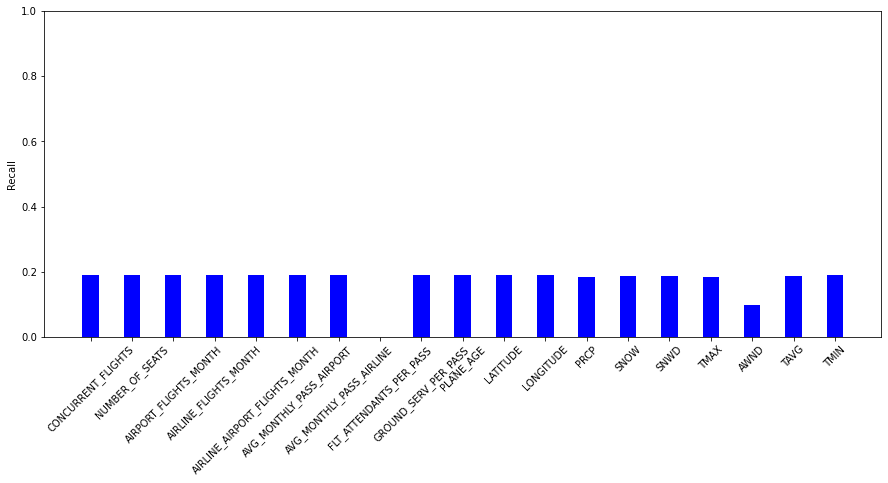

In [39]:
plt.figure(figsize = (15, 6))
plt.bar(color="blue", width = 0.4, height= modelparams[:,2], x = column_names )
#plt.xlabel("Selected features")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.xticks(range(19), column_names, rotation= 45)
plt.show()